# Assignment 4:  Web Scraping Exercise

In this assignment, we will use web scraping to automate the process of getting data from the CORGIS website and visualizing it.
* You can add any number of extra code cells below that you want.

We are going to retrieve a list of all the CORGIS CSV Datasets.  To do this, include the following steps in the cell below:
* Import requests and BeautifulSoup
* Use `requests.get` to retrieve the html code of the CORGIS [CSV Datasets](https://corgis-edu.github.io/corgis/csv/) webpage
* Use `BeautifulSoup` to parse the html and create a list containing all occurrences of the "h3" html tag
  * Look at the page source of the above link to identify why it makes sense to search for the \<h3\> tags in the page
* Using the list of h3 tags, make a Python list of all the dataset names and store it in the variable `corgis_list`.  
* When you have your list, print it out.  The output should be the following:
    * `['Aids', 'Airlines', 'Astronauts', 'Billionaires', 'Broadway', 'Business Dynamics', 'Cancer', 'Cars', 'Classics', 'Coffee', 'Construction Permits', 'Construction Spending', 'Consumer Price Index', 'County Demographics', 'Covid', 'Covid Behaviors', 'Covid Mobility', 'Drugs', 'Earthquakes', 'Election', 'Electricity', 'Emissions', 'Energy', 'Finance', 'Food', 'Food Access', 'Global Development', 'Global Emissions', 'Graduates', 'Health', 'Hospitals', 'Hydropower', 'Ingredients', 'Injuries', 'Labor', 'Medal Of Honor', 'Monkeypox', 'Music', 'Nuclear Explosions', 'Opioids', 'Parking Citations', 'Police Shootings', 'Publishers', 'Real Estate', 'Retail Services', 'School Scores', 'Skyscrapers', 'Slavery', 'Smoking', 'State Crime', 'State Demographics', 'State Fragility', 'Suicide Attacks', 'Super Bowl Ads', 'Supreme Court', 'Tate', 'Ufo Sightings', 'Video Games', 'Weather', 'Wind Turbines']`

In [63]:
import requests
from bs4 import BeautifulSoup

url = "https://corgis-edu.github.io/corgis/csv/"
response = requests.get(url)

# use BeautifulSoup to parse the HTML and then take all occurrences of h3 tags
soup = BeautifulSoup(response.text, 'html.parser')
h3_tags = soup.find_all('h3')

# list of dataset names
corgis_list = [tag.text for tag in h3_tags]

print(corgis_list)

['Aids', 'Airlines', 'Astronauts', 'Billionaires', 'Broadway', 'Business Dynamics', 'Cancer', 'Cars', 'Classics', 'Coffee', 'Construction Permits', 'Construction Spending', 'Consumer Price Index', 'County Demographics', 'Covid', 'Covid Behaviors', 'Covid Mobility', 'Drugs', 'Earthquakes', 'Election', 'Electricity', 'Emissions', 'Energy', 'Finance', 'Food', 'Food Access', 'Global Development', 'Global Emissions', 'Graduates', 'Health', 'Hospitals', 'Hydropower', 'Ingredients', 'Injuries', 'Labor', 'Medal Of Honor', 'Monkeypox', 'Music', 'Nuclear Explosions', 'Opioids', 'Parking Citations', 'Police Shootings', 'Publishers', 'Real Estate', 'Retail Services', 'School Scores', 'Skyscrapers', 'Slavery', 'Smoking', 'State Crime', 'State Demographics', 'State Fragility', 'Suicide Attacks', 'Super Bowl Ads', 'Supreme Court', 'Tate', 'Ufo Sightings', 'Video Games', 'Weather', 'Wind Turbines']


Write a function that takes an element from `corgis_list`, searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe.

Hints:
* If you define a function `pdcorgis` and want to call it with Python code like `classics_data = pdcorgis(corgis_list[0])`, then an example set of Python commands inside the function could be:
  1. Convert the dataset name to lowercase [Note that `a.lower()` will give a lowercase version of the string `a`]
  1. Get the HTML code from the website using `requests` with the appropriate website name, which here would be "https://corgis-edu.github.io/corgis/csv/" plus the dataset name plus the string "/" 
  1. Use `BeautifulSoup` to find all the HTML links on that page (links have the tag "a")
  1. For any link element (which here I'll call "i"), test whether `i.has_attr('download')` is true or false; if it is true, then store the value of `i['href']` in a variable to use as part of the download link for the csv file
  1. The complete download link for the file will be "https://corgis-edu.github.io/corgis/csv/" plus the dataset name plus the string "/" plus the string stored in the result you found for `i['href']`
  1. Use `pd.read_csv()` to read data stored at the download link for the csv file; assign the resulting dataframe to a variable
  1. Use a `return` statement to return the dataframe from your function.  [For example, if I saved the dataframe as the variable `corgisdf`, I would use `return corgisdf` at the end of my function]
    

In [64]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def pdcorgis(dataset_name):
    dataset_name_lower = dataset_name.lower()
    url = f"https://corgis-edu.github.io/corgis/csv/{dataset_name_lower}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    links = soup.find_all('a')
    
    download_link = None
    for link in links:
        if link.has_attr('download'):
            download_link = link['href']
            break
    
    if download_link:
        csv_url = f"https://corgis-edu.github.io/corgis/csv/{dataset_name_lower}/{download_link}"
        corgisdf = pd.read_csv(csv_url)
        return corgisdf
    else:
        print("Download link not found for", dataset_name)
        return None


Confirm that your function works for an arbitrary element of your list of CORGIS datasets.  
* For example:  if your list of CORGIS datasets is `corgis_list` and your function name is `pdcorgis`, then executing `pdcorgis(corgis_list[0]).head()` will output the first five rows of the dataset corresponding to `corgis_list[0]`, the first name in your list

You can include any code/output for checking this that you want, but for the final result, you should at least confirm that executing `pdcorgis(corgis_list[0]).head()` gives reasonable output (where `pdcorgis` and `corgis_list` are changed to your own function name and list name as needed).

In [65]:
aids_data = pdcorgis(corgis_list[0]).head() # aids dataset
print("Here is a sample of the " + corgis_list[0] + " Dataset from CORGIS:")
print(aids_data)

Here is a sample of the Aids Dataset from CORGIS:
       Country  Year  Data.AIDS-Related Deaths.AIDS Orphans  \
0  Afghanistan  1990                                    100   
1      Algeria  1990                                    200   
2       Angola  1990                                   1300   
3    Argentina  1990                                    500   
4      Armenia  1990                                    100   

   Data.AIDS-Related Deaths.Adults  Data.AIDS-Related Deaths.All Ages  \
0                              100                                100   
1                              100                                100   
2                              500                               1000   
3                              200                                500   
4                              100                                100   

   Data.AIDS-Related Deaths.Children  Data.AIDS-Related Deaths.Female Adults  \
0                                100                

Look at the list of dataset names, and choose 3 datasets for visualization.  

* Make a line plot with your first choice
* Make a bar plot with your second choice
* Make a histogram plot with your third choice

Notes:
* You should use your list of dataset names and your function defined above to retrieve the data needed for visualization.
* All plots should present a visualization that is reasonably understandable (no zigzagging lines in a chaotic mess, there should not be a large number of overlapping labels, and etc)
* You will likely find it useful to first use the `head()` method to get a quick idea of what data is stored in each dataframe.
* Depending on your data, you may want to subset your data before making any plot.
* Remember that bar plots have categorical data on the horizontal axis.

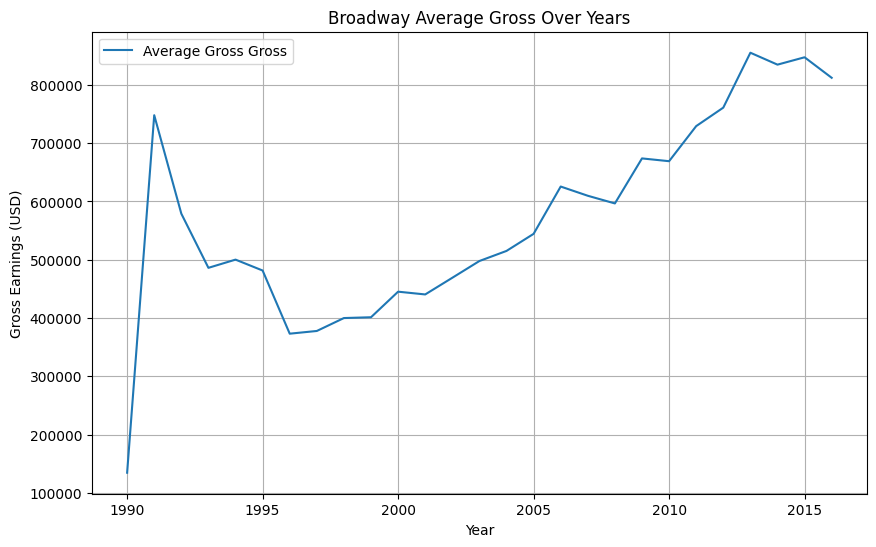

In [66]:
import matplotlib.pyplot as plt

broadway_data = pdcorgis('Broadway')

# average yearly gross earnings (by Broadway plays):
broadway_yearly = broadway_data.groupby('Date.Year')['Statistics.Gross'].mean().reset_index()

# line plot for Broadway dataset: Average Gross Earnings from Broadway plays over Time:
plt.figure(figsize=(10, 6))
plt.plot(broadway_yearly['Date.Year'], broadway_yearly['Statistics.Gross'], label='Average Gross Gross')
plt.xlabel('Year')
plt.ylabel('Gross Earnings (USD)')
plt.title('Broadway Average Gross Over Years')
plt.legend()
plt.grid(True)
plt.show()

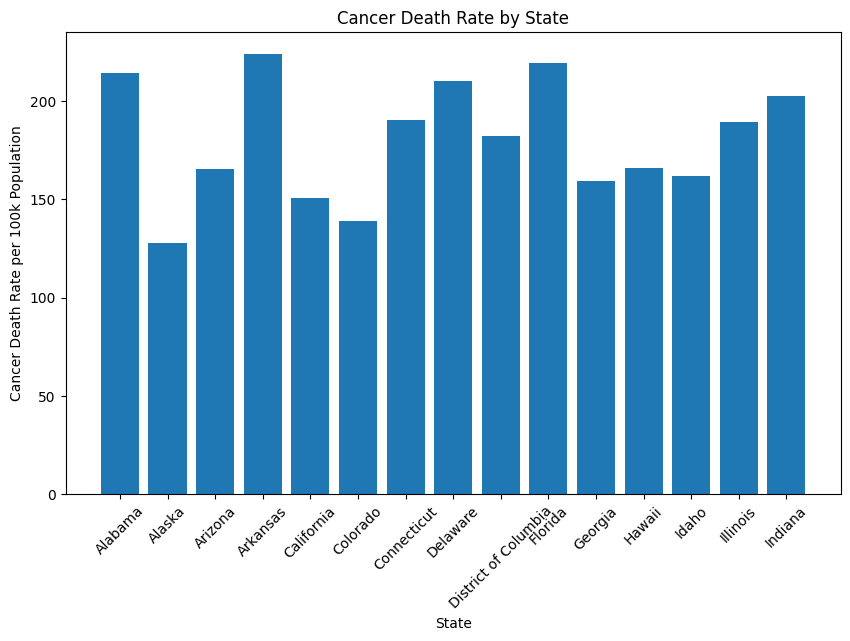

In [67]:
cancer_data = pdcorgis('Cancer')

# bar plot for Cancer dataset
plt.figure(figsize=(10, 6))
cancer_subset = cancer_data.head(15) # take a subset of 15 states (out of 50)
plt.bar(cancer_subset['State'], cancer_subset['Total.Rate'])
plt.xlabel('State')
plt.ylabel('Cancer Death Rate per 100k Population')
plt.title('Cancer Death Rate by State')
plt.xticks(rotation=45)
plt.show()

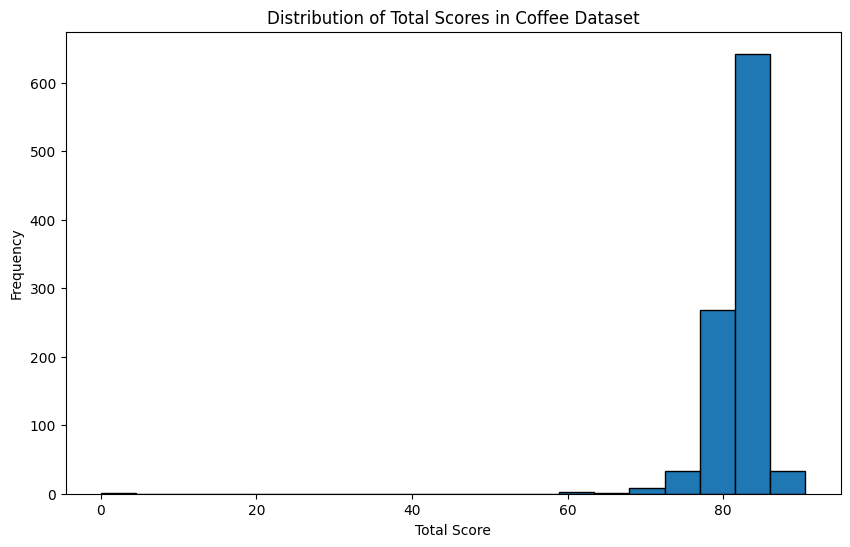

In [68]:
coffee_data = pdcorgis('Coffee')

# histogram plot for Coffee dataset
plt.figure(figsize=(10, 6))
plt.hist(coffee_data['Data.Scores.Total'], bins=20, edgecolor='black')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.title('Distribution of Total Scores in Coffee Dataset')
plt.show()

# Submit
Submit this assignment by:

* Saving your work
* Clicking on the Submit button at the top